# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [1]:
#!pip install lseg.data
#!pip install cufflinks
#!pip install matplotlib
#!pip install seaborn

In [1]:
import sys
print(sys.version)

3.11.11 | packaged by conda-forge | (main, Dec  5 2024, 14:21:42) [Clang 18.1.8 ]


In [32]:
import os
os.environ["LD_LIB_CONFIG_PATH"] = "../../Configuration"

In [33]:
import lseg.data as ld

In [34]:
ld.open_session()

<lseg.data.session.Definition object at 0x1159f4590 {name='workspace'}>

In [5]:
df = ld.get_data(
        universe=['IBM.N', 'VOD.L'], 
        fields=['BID', 'ASK', 'TR.Revenue']
    )
print(df)

  Instrument      Revenue   BID  ASK
0      IBM.N  62753000000   0.0    0
1      VOD.L  36717000000  67.2   71


In [35]:
import pandas as pdf
import numpy as np
import cufflinks as cf  # Cufflinks
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Numpy

In [9]:
# Python program to demonstrate
# basic array characteristics
import numpy as np
 
# Creating array object
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
 
# Printing type of arr object
print("Array is of type: ", type(arr))
 
# Printing array dimensions (axes)
print("No. of dimensions: ", arr.ndim)
 
# Printing shape of array
print("Shape of array: ", arr.shape)
 
# Printing size (total number of elements) of array
print("Size of array: ", arr.size)
 
# Printing type of elements in array
print("Array stores elements of type: ", arr.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (2, 3)
Size of array:  6
Array stores elements of type:  int64


In [10]:
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
arr[0][0]

1

In [11]:
type(arr)

numpy.ndarray

## Python Pandas

In [12]:
import pandas as pd 

data = {
  "sesion": [420, 380, 390],
  "asistencia": [25, 20, 27]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
df


,sesion,asistencia
0,420,25
1,380,20
2,390,27


In [13]:
#utilización de índice:
print(df.loc[2])

sesion        390
asistencia     27
Name: 2, dtype: int64


In [14]:
df = pd.DataFrame(data, index = ["dia1", "dia2", "dia3"])
df 

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


# Refinitiv Python

# Extracción de datos estructurados

Las funciones básicas para extraer datos de eikon son las siguiente:
- get_symbology
- get_data
- get_timeseries

get_symbology(symbol, from_symbol_type='RIC', to_symbol_type=None, raw_output=False, debug=False, bestMatch=True)
Devuelve una lista de nombre de instrumentos convertiods en el código del intrumento.

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
Devuelve un dataframe de pandas con campos en columnas e intrumentos como índice de renglones.

get_timeseries(rics, fields='*', start_date=None, end_date=None, interval='daily', count=None, calendar=None, corax=None, normalize=False, raw_output=False, debug=False)
Devuelve series históricas de uno o varios RICs.
<br>
Referencia: https://docs-developers.refinitiv.com/1594387995587/14684/book/en/eikon/index.html
RICs Reuters instrument code

# Obtener datos

In [15]:
data = ld.get_data(["SPOT.K", "IBM", "GOOG.O", "MSFT.O"], ["TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])

In [16]:
data

,Instrument,Price Close,Volume,Price Low,YTD Total Return
0,SPOT.K,584.14,2981827,560.1,34.082883
1,IBM,253.21,5293765,248.1,14.573154
2,GOOG.O,168.66,24121991,167.64,-11.436673
3,MSFT.O,388.49,23007726,386.155,-7.647718


In [17]:
type(data)

pandas.core.frame.DataFrame

In [18]:
data.index

RangeIndex(start=0, stop=4, step=1)

# Obtener datos de un índice

In [19]:
dax = ld.get_data('0#.GDAXI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])

In [35]:
dax

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,49.705,2720400,17.063118
1,IFXGn.DE,Infineon Technologies AG,36.935,2945582,18.696312
2,SIEGn.DE,Siemens AG,223.45,1369236,21.239707
3,EONGn.DE,E On Se,12.425,12586491,10.493553
4,DBKGn.DE,Deutsche Bank AG,20.9,9212705,25.600962
5,SATG_p.DE,Sartorius AG,246.0,98305,14.312268
6,SAPG.DE,SAP SE,275.2,1318253,16.462124
7,BAYGn.DE,Bayer AG,23.035,3037311,19.265818
8,RWEG.DE,RWE AG,30.67,1850094,6.382241
9,HNKG_p.DE,Henkel AG & Co KGaA,83.5,840322,-1.416765


In [20]:
dax[0:5]

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,48.47,3331407,17.781441
1,IFXGn.DE,Infineon Technologies AG,34.07,6123706,15.450521
2,SIEGn.DE,Siemens AG,213.3,1853495,22.596159
3,EONGn.DE,E On Se,12.455,8641667,9.381948
4,DBKGn.DE,Deutsche Bank AG,19.358,17905165,25.901442


In [21]:
dax.set_index('Instrument')['YTD Total Return']

Instrument
BASFn.DE     17.781441
IFXGn.DE     15.450521
SIEGn.DE     22.596159
EONGn.DE      9.381948
DBKGn.DE     25.901442
SATG_p.DE     9.944238
SAPG.DE      14.917478
BAYGn.DE     24.262193
RWEG.DE        6.20881
HNKG_p.DE    -0.661157
ZALG.DE       8.243285
DTEGn.DE     24.091381
MRCG.DE      -1.000715
PSHG_p.DE     7.070151
VOWG_p.DE    19.609164
BMWG.DE       7.520891
BEIG.DE       8.629032
HEIG.DE      25.440067
RHMG.DE      86.218679
MTXGn.DE      7.298137
FMEG.DE       7.472826
FREG.DE      16.964818
DHLn.DE      12.948793
ALVG.DE      15.005069
MUVGn.DE     15.294601
CONG.DE       7.096575
SHLG.DE       7.328494
SY1G.DE      -4.744277
ADSGn.DE      4.814189
HNRGn.DE      9.693455
DTGGe.DE     17.286296
ENR1n.DE     10.083366
MBGn.DE      12.881041
BNRGn.DE     11.610228
CBKG.DE      35.516693
AIRG.DE      13.569856
VNAn.DE      -1.466576
DB1Gn.DE     15.692446
QIA.DE      -14.287032
P911_p.DE     -2.32797
Name: YTD Total Return, dtype: Float64

In [22]:
dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]


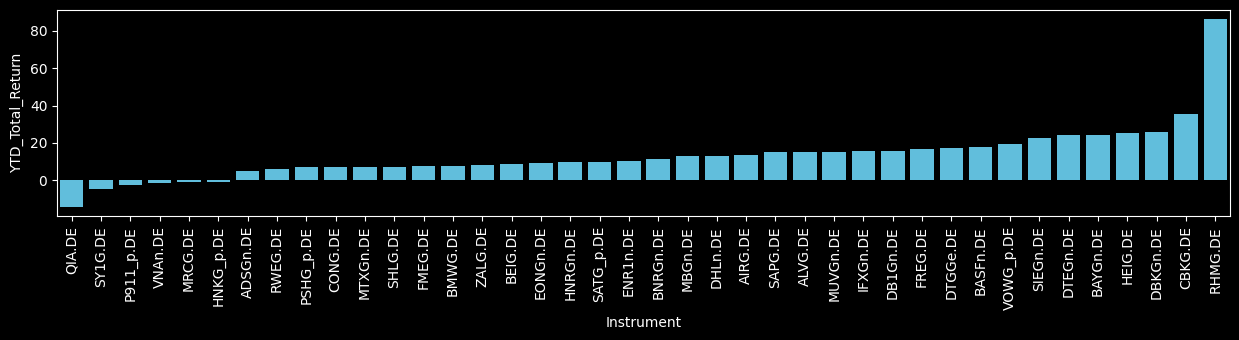

In [23]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]

bar_plot = sns.barplot(x=dax2.index, y=dax2['YTD_Total_Return'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [24]:
type(dax2)

pandas.core.frame.DataFrame

### Generen grafico para volumen de menor a mayor DJI

In [25]:
lp4 = ld.get_data('LP40065886', ['TR.FundHoldingRIC','TR.FundHoldingName',
                           'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares',
                           'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [26]:
lp4

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,LP40065886,AAPL.OQ,APPLE INC ORD,6.1004,7588822.0,-110383.0
1,LP40065886,MSFT.OQ,MICROSOFT CORP ORD,5.2773,3732734.0,-54268.0
2,LP40065886,NVDA.OQ,NVIDIA CORP ORD,4.7768,11679718.0,-171272.0
3,LP40065886,AMZN.OQ,AMAZON.COM INC ORD,3.8458,4750252.0,-70396.0
4,LP40065886,META.OQ,META PLATFORMS INC ORD,2.5689,1094332.0,-16159.0
...,...,...,...,...,...,...
3157,LP40065886,,AMBIT BIOSCIENCES CORP CVR,0.0,29736.0,0.0
3158,LP40065886,CPSH.OQ,CPS TECHNOLOGIES CORP ORD,0.0,8161.0,0.0
3159,LP40065886,EKSO.OQ,EKSO BIONICS HOLDINGS INC ORD,0.0,14085.0,0.0
3160,LP40065886,,ALEXZA PHARMACEUTICALS INC CVR,0.0,80591.0,0.0


In [27]:
XLE= ld.get_data('XLE', ['TR.FundHoldingRIC','TR.FundHoldingName', 'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares', 'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [28]:
XLE

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,22.4704,66575772.0,-1447789.0
1,XLE,CVX.N,CHEVRON CORP ORD,15.7831,32820860.0,-713791.0
2,XLE,COP.N,CONOCOPHILLIPS ORD,7.6359,25402840.0,-552357.0
3,XLE,WMB.N,WILLIAMS COMPANIES INC ORD,4.6423,26319449.0,-572342.0
4,XLE,EOG.N,EOG RESOURCES INC ORD,4.3982,11428643.0,-248536.0
5,XLE,OKE.N,ONEOK INC ORD,4.3207,14196495.0,-311861.0
6,XLE,SLB.N,SCHLUMBERGER NV ORD,4.081,32312257.0,-702573.0
7,XLE,PSX.N,PHILLIPS 66 ORD,3.7155,9449817.0,-205505.0
8,XLE,KMI.N,KINDER MORGAN INC ORD,3.6335,44225985.0,-961771.0
9,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,3.3482,7353854.0,-159886.0


In [29]:
XLE.columns = [c.replace(' ', '_') for c in XLE.columns]
list_values = ['USD CASH', 'OTHER ASSETS LESS LIABILITIES']
XLE[~XLE['Holding_Name'].isin(list_values)]

,Instrument,Holding_RIC,Holding_Name,Percentage_of_Fund_Assets,Number_of_Shares,Number_of_Shares_Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,22.4704,66575772.0,-1447789.0
1,XLE,CVX.N,CHEVRON CORP ORD,15.7831,32820860.0,-713791.0
2,XLE,COP.N,CONOCOPHILLIPS ORD,7.6359,25402840.0,-552357.0
3,XLE,WMB.N,WILLIAMS COMPANIES INC ORD,4.6423,26319449.0,-572342.0
4,XLE,EOG.N,EOG RESOURCES INC ORD,4.3982,11428643.0,-248536.0
5,XLE,OKE.N,ONEOK INC ORD,4.3207,14196495.0,-311861.0
6,XLE,SLB.N,SCHLUMBERGER NV ORD,4.081,32312257.0,-702573.0
7,XLE,PSX.N,PHILLIPS 66 ORD,3.7155,9449817.0,-205505.0
8,XLE,KMI.N,KINDER MORGAN INC ORD,3.6335,44225985.0,-961771.0
9,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,3.3482,7353854.0,-159886.0


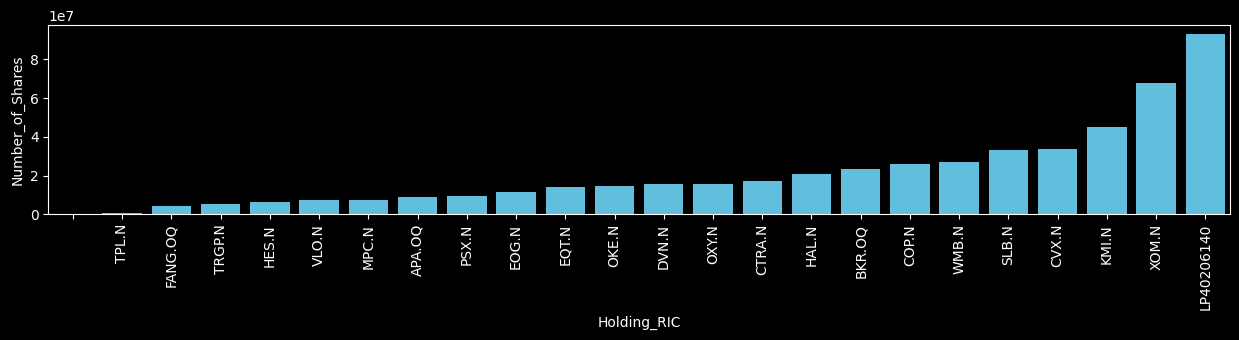

In [45]:
XLE2 = XLE[~XLE['Holding_Name'].isin(list_values)].set_index('Holding_RIC')['Number_of_Shares'].sort_values().to_frame()
type(XLE2)
bar_plot = sns.barplot(x=XLE2.index, y=XLE2['Number_of_Shares'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [46]:
help(ld.get_data)

Help on function get_data in module lseg.data._access_layer.get_data_func:

get_data(universe: Union[str, Iterable[str]], fields: Union[str, Iterable[str]], parameters: Union[str, dict, NoneType] = None, header_type: lseg.data.content._header_type.HeaderType = <HeaderType.TITLE: 2>) -> pandas.core.frame.DataFrame
    Retrieves pricing snapshots, as well as Fundamental and Reference data.
    
    Parameters
    ----------
    universe: str | list
        Instruments to request
    fields: str | list
        Fields to request
    parameters: str | dict, optional
        Single key=value global parameter or dictionary of global parameters to request
    header_type: HeaderType, default HeaderType.TITLE
        If HeaderType.TITLE - returns field title as column headers for data
        If HeaderType.NAME - returns field name as column headers for data
        If HeaderType.NAME_AND_TITLE - returns field name and title as column headers for data
    
    Returns
    -------
    pandas.Dat

# Descargar series de tiempo

In [47]:
#help(rd.get_timeseries)

In [30]:
df_ts = ld.get_history(universe=["000001.SZ"], fields=["BID", "ASK"], interval="1D",
               start = "2016-06-13", end = "2024-07-20")

In [31]:
df_ts

000001.SZ,BID,ASK
Date,,
2016-06-13,8.599997,8.60833
2016-06-14,8.65833,8.666663
2016-06-15,8.699997,8.70833
2016-06-16,8.57,8.58
2016-06-17,8.57,8.58
...,...,...
2024-07-15,10.32,10.33
2024-07-16,10.3,10.31
2024-07-17,10.39,10.4


In [39]:
import datetime as dt
today = dt.date.today()
d = today - dt.timedelta(days=100)
print(today, d)

2025-03-04 2024-11-24


In [40]:
df_ts = ld.get_history(universe=["000001.SZ"], fields=["BID", "ASK"], interval="1D",
               start = d, end = today)
df_ts

000001.SZ,BID,ASK
Date,,
2024-11-25,11.18,11.19
2024-11-26,11.27,11.28
2024-11-27,11.39,11.4
2024-11-28,11.33,11.34
2024-11-29,11.38,11.39
...,...,...
2025-02-26,11.52,11.53
2025-02-27,11.62,11.63
2025-02-28,11.52,11.53


# Estadística Básica

In [41]:
dax_corto = dax['Instrument'][0:10].tolist()
dax_corto

['BASFn.DE',
 'IFXGn.DE',
 'SIEGn.DE',
 'EONGn.DE',
 'DBKGn.DE',
 'SATG_p.DE',
 'SAPG.DE',
 'BAYGn.DE',
 'RWEG.DE',
 'HNKG_p.DE']

In [50]:
dax_corto = ["GOLD.N", "TSLA.O", "005930.KS"]

In [42]:
import datetime as dt
today = dt.datetime.today()
delta_day = today - dt.timedelta(days=100)
print(today, d)

2025-03-04 16:15:49.924122 2024-11-24


In [51]:
df_ts_rndm = ld.get_history(['GOLD.N'], fields = ['ASK'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")

Precios = df_ts_rndm.rename(columns={'ASK': 'GOLD.N'})
Precios

GOLD.N,GOLD.N
Date,
2024-11-25,17.69
2024-11-26,17.57
2024-11-27,17.58
2024-11-29,17.5
2024-12-02,17.24
...,...
2025-02-26,18.46
2025-02-27,17.8
2025-02-28,17.75


In [52]:
for i in [1,2,3]:
    print(i)

1
2
3


In [53]:
for i in dax_corto[1:]:
    print(i)
    w = ld.get_history([i], fields = ['ASK'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")
    w1 = w.rename(columns={'ASK': i})
    Precios = Precios.join(w1, lsuffix="_left", rsuffix="_right")

TSLA.O
005930.KS


In [54]:
Precios

,GOLD.N,TSLA.O,005930.KS
Date,,,
2024-11-25,17.69,338.46,58000
2024-11-26,17.57,338.35,58300
2024-11-27,17.58,332.89,56400
2024-11-29,17.5,345.16,54300
2024-12-02,17.24,357.1,53700
...,...,...,...
2025-02-26,18.46,290.89,56700
2025-02-27,17.8,282.0,56400
2025-02-28,17.75,293.32,54600


In [55]:
Precios.describe()

,GOLD.N,TSLA.O,005930.KS
count,66.0,66.0,60.0
mean,16.76197,382.91197,54871.666667
std,1.019963,46.562276,1689.357682
min,15.23,272.0,51000.0
25%,15.825,354.1975,53700.0
50%,16.745,393.54,54300.0
75%,17.61,414.7775,55925.0
max,18.83,479.86,58800.0


In [56]:
correlacion = Precios[dax_corto].corr()
print(correlacion)

             GOLD.N    TSLA.O  005930.KS
GOLD.N     1.000000 -0.745811   0.571575
TSLA.O    -0.745811  1.000000  -0.433514
005930.KS  0.571575 -0.433514   1.000000


<Axes: >

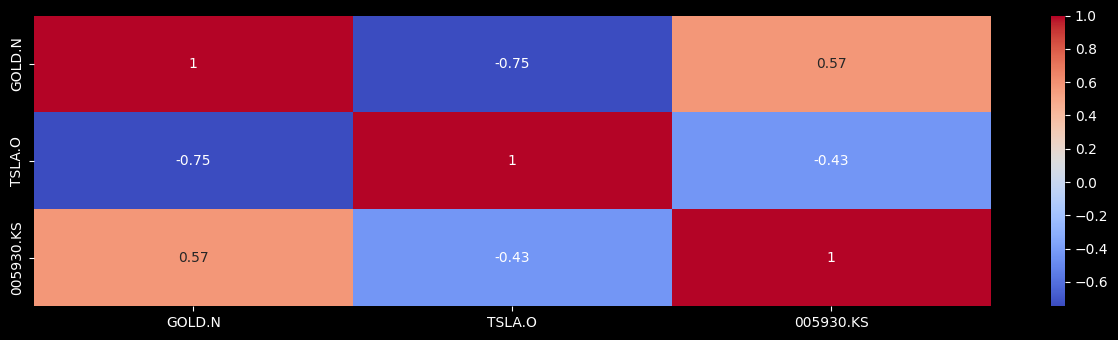

In [57]:
sns.heatmap(Precios[dax_corto].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
Seleccionar un índice o fondo 
Calcular el rendimiento del fondo o índice 
- 1 año para atrás hoy y 
- lo van comparar a 2 años atrás a 1 año
Filtro de Clenow a los instrumuentos que son más dinámicos del periodo 2 años atrás a 1 año (2021 a 2022)
- rendimientos en el periodo de 1 año para atrás hoy (2022 a 2023)

Si se cumple o no la hipotésis que plantea Clenow